2、	设计一个简单的巴特沃斯低通滤波器（截止频率自选），对图像A作频域低通滤波，再作反变换，观察两种不同的截止频率下反变换后的图像与原图像的区别。

C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


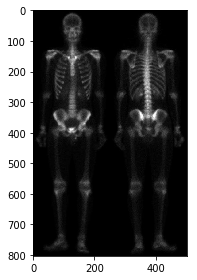

In [12]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
A = io.imread(r'.\pic\A.tif',0)
io.imshow(A)

巴特沃斯滤波器函数

$h(u,v) = \frac{1} {{1+(D_0 / D(u,v))}^{2n}}$

In [13]:
def butterworthPassFilter(image,d,n):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    
    def make_transform_matrix(d):
        transfor_matrix = np.zeros(image.shape)
        center_point = tuple(map(lambda x:(x-1)/2,image.shape))
        for i in range(transfor_matrix.shape[0]):
            for j in range(transfor_matrix.shape[1]):
                def cal_distance(pa,pb):
                    from math import sqrt
                    dis = sqrt((pa[0]-pb[0])**2+(pa[1]-pb[1])**2)
                    return dis
                dis = cal_distance(center_point,(i,j))
                transfor_matrix[i,j] = 1/((1+(d/dis))**n)
        return transfor_matrix
    d_matrix = make_transform_matrix(d)
    new_img = np.abs(np.fft.ifft2(np.fft.ifftshift(fshift*d_matrix)))
    return new_img

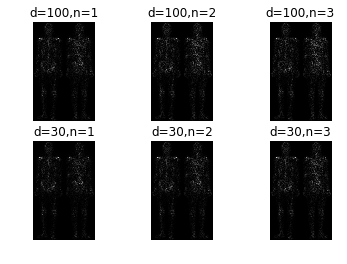

In [14]:
plt.subplot(231)
butter_100_1 = butterworthPassFilter(img,100,1)
plt.imshow(butter_100_1,cmap="gray")
plt.title("d=100,n=1")
plt.axis("off")
plt.subplot(232)
butter_100_2 = butterworthPassFilter(img,100,2)
plt.imshow(butter_100_2,cmap="gray")
plt.title("d=100,n=2")
plt.axis("off")
plt.subplot(233)
butter_100_3 = butterworthPassFilter(img,100,3)
plt.imshow(butter_100_3,cmap="gray")
plt.title("d=100,n=3")
plt.axis("off")
plt.subplot(234)
butter_100_1 = butterworthPassFilter(img,30,1)
plt.imshow(butter_100_1,cmap="gray")
plt.title("d=30,n=1")
plt.axis("off")
plt.subplot(235)
butter_100_2 = butterworthPassFilter(img,30,2)
plt.imshow(butter_100_2,cmap="gray")
plt.title("d=30,n=2")
plt.axis("off")
plt.subplot(236)
butter_100_3 = butterworthPassFilter(img,30,3)
plt.imshow(butter_100_3,cmap="gray")
plt.title("d=30,n=3")
plt.axis("off")
plt.show()